In [ ]:
1.  What is Boosting in Machine Learning? Explain how it improves weak learners.

    -> Boosting is an iterative, sequential ensemble learning technique that combines multiple "weak learners"
       to build a single, highly accurate "strong learner" by focusing on the mistakes of previous models.


      #  How Boosting Improves Weak Learners

# 1. Sequential Training:
            Unlike methods that train models independently (like bagging), boosting trains weak learners one after another in a specific order.
# 2. Weighting Misclassified Data:
                After each weak learner is trained, the algorithm identifies the data points that were misclassified.
                   It then assigns higher weights to these difficult-to-classify examples for the next iteration.
# 3. Error Correction:
             The subsequent weak learner is trained to focus on these higher-weighted, previously misclassified instances,
                effectively trying to "correct" the errors of its predecessors.
# 4. Iterative Improvement:
            This process of adjusting weights and retraining continues iteratively. Each new model adds to the overall predictive
               power of the ensemble by focusing on the remaining mistakes.
# 5. Final Combination:
        The predictions of all the weak learners are combined, often with different weights, to form a final, strong predictive model that is
    significantly more accurate and robust than any individual weak learner.

In [ ]:
2.  : What is the difference between AdaBoost and Gradient Boosting in terms of how models are trained?

      ->  AdaBoost and Gradient Boosting both train models sequentially, but AdaBoost increases the weights of misclassified
           data points in subsequent iterations to focus on them


          #  AdaBoost Training Method

# Weighted Data Points:
             AdaBoost starts by assigning equal weights to all training data points.
# Iterative Training:
            It then trains a series of weak learners (models).
# Increase Weights:
           After each model is trained, it identifies the misclassified data points and increases their weights, making them more important for the next model.
# Weighted Combination:
              The final prediction is formed by a weighted combination of all weak learners, with models that performed better having more influence.

# Gradient Boosting Training Method

1. Sequential Models:
          Gradient Boosting also trains models sequentially, but the focus is on minimizing errors.
2. Error Prediction:
           Each new model is trained to predict the residuals, or the error, made by the previous model.
3. Gradient of Loss Function:
        To do this, it calculates the gradient of the loss function (a measure of error) to determine the optimal direction to reduce the error in each step.
# 4. Iterative Improvement:
The process iteratively adds new models that are specifically trained to correct the errors left by the previous ones, progressively reducing the overall loss.
Key Difference Summarized
# AdaBoost:
Focuses on re-weighting data points that were misclassified by previous models

In [ ]:
3.  How does regularization help in XGBoost?

      # ->  XGBoost incorporates several regularization techniques
      :
# L1 (Lasso) and L2 (Ridge) Regularization (alpha and lambda parameters):

These add penalty terms to the objective function based on the magnitude of the leaf weights.
L1 regularization (alpha):
             adds a penalty proportional to the absolute value of the leaf weights.
       This can lead to sparsity by driving less important leaf weights to zero, effectively performing feature selection at the leaf level.
# L2 regularization (lambda):
                  adds a penalty proportional to the squared magnitude of the leaf weights. This encourages smaller, more distributed weights,
                 preventing any single leaf from having too much influence and promoting a more stable model.


# Tree Complexity Control (gamma parameter):
Gamma:
             is a minimum loss reduction required to make a further partition on a leaf node of the tree.
       *  A higher gamma value makes the algorithm more conservative, preventing the growth of complex trees that might
           overfit the training data. If the gain from a split is less than gamma, the split is not performed, effectively pruning the tree.
# Subsampling:
The subsample parameter controls the fraction of training instances randomly sampled for building each tree.
Training on a subset of the data for each tree introduces randomness and helps to reduce variance, thereby mitigating overfitting



In [ ]:
4. : Why is CatBoost considered efficient for handling categorical data?

    # ->  Key reasons for CatBoost's efficiency in handling categorical data:

# Ordered Target Encoding:
                CatBoost employs a specialized form of target encoding that addresses the issue of target leakage, a common problem in
               traditional target encoding methods. It does this by using a permutation-driven approach where the target mean for a category is
                 calculated based on a subset of the data that does not include the current sample, thus preventing information from the target variable
                  from "leaking" into the feature encoding.
# Native Handling of Categorical Features:
Unlike many other gradient boosting algorithms that require explicit one-hot encoding or other manual transformations of categorical features,
 CatBoost can directly process them. It automatically identifies and converts categorical features into numerical representations using its internal
  algorithms, saving significant preprocessing time and effort.
# Ordered Boosting:
            CatBoost introduces a novel "ordered boosting" scheme that helps to prevent prediction shift, a phenomenon where the distribution of
            gradients changes during training, potentially leading to overfitting. By using a specific ordering of data points during tree construction
             and gradient calculation, CatBoost ensures that the gradients are calculated based on unbiased estimates, leading to more robust models.
# Symmetric Trees:
CatBoost utilizes symmetric trees, also known as oblivious trees, where the same splitting condition is applied at each level of the tree.
 This structure allows for more efficient computation and parallelization, further contributing to faster training times, especially wit
 h large datasets and numerous categorical features.
  *  These features combined allow CatBoost to effectively leverage the information contained within categorical variables while maintaining
 high performance and reducing the risk of overfitting, making it a highly efficient choice for datasets with a significant presence of categorical data.


In [ ]:
5.  : What are some real-world applications where boosting techniques are preferred over bagging methods?

      #  -> Specific Applications for Boosting:
Fraud Detection:
         Boosting models like Gradient Boosting can focus on and correct misclassified transactions by assigning higher weights to them in subsequent
           training rounds, leading to more precise detection of fraudulent activities.
# Credit Scoring:
          The iterative learning in boosting allows models to become highly precise in assessing credit risk by continuously refining their predictions
            based on past data and focusing on individuals likely to default.
# Customer Churn Prediction:
               Boosting's ability to reduce bias and improve predictive power makes it suitable for identifying customers likely to leave a service, as it
                 can sequentially learn from complex patterns in the data.
# Image and Object Identification:
              Boosting algorithms can achieve high performance in image and object recognition tasks by progressively improving the identification of features and objects.
# Data Mining and Sentiment Analysis:
                The focus on reducing bias in boosting makes it ideal for applications where a strong predictive model is needed to uncover subtle
                   patterns and sentiment in large datasets.


In [1]:
6.  Write a Python program to:
 ● Train an AdaBoost Classifier on the Breast Cancer dataset
● Print the model accuracy


from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Initialize AdaBoost Classifier
model = AdaBoostClassifier(n_estimators=100, random_state=42)

# Train model
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")


Model Accuracy: 0.9737


In [2]:
7.
Write a Python program to:
● Train a Gradient Boosting Regressor on the California Housing dataset
● Evaluate performance using R-squared score


from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score

# Load dataset
data = fetch_california_housing()
X, y = data.data, data.target

# Split dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Initialize Gradient Boosting Regressor
model = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1,
                                  max_depth=3, random_state=42)

# Train model
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate with R-squared score
r2 = r2_score(y_test, y_pred)
print(f"R-squared Score: {r2:.4f}")


R-squared Score: 0.8004


In [3]:
8.  Write a Python program to:
● Train an XGBoost Classifier on the Breast Cancer dataset
 ● Tune the learning rate using GridSearchCV
● Print the best parameters and accuracy



from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Initialize XGBoost Classifier
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Define parameter grid for learning_rate
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3]
}

# GridSearchCV
grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    n_jobs=-1
)

# Fit model
grid_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)

# Evaluate on test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Test Accuracy: {accuracy:.4f}")


Best Parameters: {'learning_rate': 0.2}
Test Accuracy: 0.9561


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [16:58:43] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


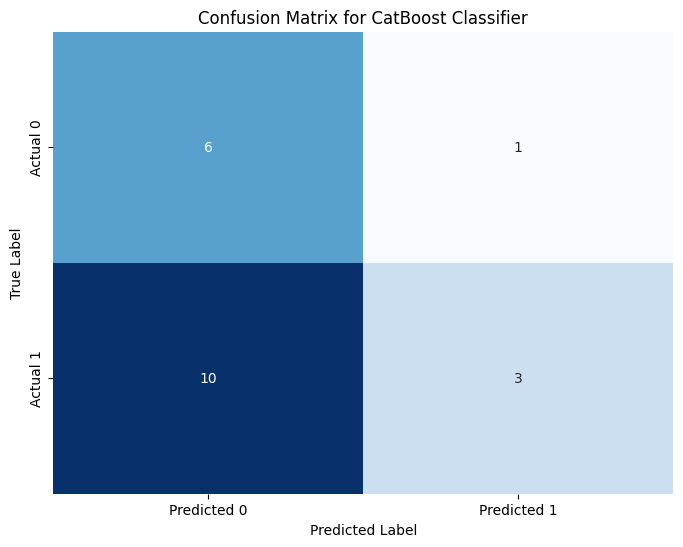

Model Accuracy: 0.45


In [9]:
9.   Write a Python program to:
 ● Train a CatBoost Classifier
 ● Plot the confusion matrix using seaborn



import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt


# 1. Data Preparation (Example using a dummy dataset)
# In a real-world scenario, load your dataset here (e.g., pd.read_csv('your_data.csv'))
data = {
    'feature1': np.random.rand(100),
    'feature2': np.random.rand(100) * 10,
    'feature3': np.random.randint(0, 2, 100), # Categorical feature
    'target': np.random.randint(0, 2, 100) # Binary target variable
}
df = pd.DataFrame(data)

X = df[['feature1', 'feature2', 'feature3']]
y = df['target']

# Identify categorical features
categorical_features_indices = [X.columns.get_loc('feature3')]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Train a CatBoost Classifier
model = CatBoostClassifier(
    iterations=100,
    learning_rate=0.1,
    depth=6,
    loss_function='Logloss',
    random_seed=42,
    verbose=False  # Suppress training output for cleaner console
)

model.fit(X_train, y_train, cat_features=categorical_features_indices)

# 3. Make predictions on the test set
y_pred = model.predict(X_test)

# 4. Calculate and Plot the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for CatBoost Classifier')
plt.show()

# Optional: Print accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

In [ ]:
10. : You're working for a FinTech company trying to predict loan default using
customer demographics and transaction behavior.
The dataset is imbalanced, contains missing values, and has both numeric and
categorical features.
Describe your step-by-step data science pipeline using boosting techniques:
● Data preprocessing & handling missing/categorical values
● Choice between AdaBoost, XGBoost, or CatBoost
● Hyperparameter tuning strategy
● Evaluation metrics you'd choose and why
● How the business would benefit from your model




# -->   1. Data Preprocessing & Handling Missing/Categorical Values

Load and Inspect Data:
             Load the dataset and use functions like info() and describe() to understand its structure, data types, and summary statistics.
Handle Missing Values:
Imputation:
             For numerical features, use mean, median, or a model-based imputer. For categorical features, use the mode or a constant value.
Consideration:
               Given the imbalanced nature, you may want to impute missing values in a way that doesn't further skew the data.
# Handle Categorical Features:
Encoding:
      Since boosting models can handle categorical features directly, consider using techniques like one-hot encoding or,
       preferably, CatBoost's built-in categorical encoding to avoid high dimensionality and potential data leakage.
Handle Imbalanced Data:
Resampling:
          Address the class imbalance by oversampling the minority class (defaulted loans) using techniques like SMOTE (Synthetic Minority
          Over-sampling Technique) or undersampling the majority class.
Class Weights:
         Alternatively, some boosting algorithms (like XGBoost and CatBoost) have built-in parameters to assign class weights to give more importance
           to the minority class during training.
Feature Scaling:
             While not strictly necessary for tree-based models, it can be beneficial for some boosting algorithms or when comparing with other
                models, and it is a good practice for overall robustness.

# 2. Choice Between AdaBoost, XGBoost, or CatBoost

CatBoost:
            Recommended for this use case because it excels at handling categorical features directly and automatically, which simplifies
                the preprocessing step significantly and improves performance.
XGBoost:
          A very popular and efficient gradient boosting library, but it requires one-hot encoding for categorical features, which can increase
             the feature space and potentially lead to issues if not managed well.
AdaBoost:
           An older, foundational algorithm. While effective, it can be sensitive to noisy data and may not be as performant or efficient
                as XGBoost or CatBoost for complex datasets with many features.

# 3. Hyperparameter Tuning Strategy

Grid Search CV:
    A systematic approach where you define a grid of hyperparameter values and evaluate all combinations using cross-validation.
  This is good but can be computationally expensive.
# Bayesian Optimization:
          A  more advanced and efficient method that uses probabilistic models to predict the performance of hyperparameters and
             intelligently chooses the next set of parameters to evaluate. This can find optimal values faster than grid search.

# Key Hyperparameters to Tune (for XGBoost/CatBoost):

n_estimators (number of boosting rounds)
learning_rate (step size shrinkage)
max_depth (maximum depth of trees)
subsample and colsample_bytree (data and feature subsampling)
reg_alpha and reg_lambda (L1 and L2 regularization)
scale_pos_weight (for handling imbalanced datasets in XGBoost)

# 4. Evaluation Metrics

Precision:
Of all the loans predicted as defaults, what percentage actually defaulted. High precision minimizes false positives (flagging a good loan as a default).
Recall (Sensitivity):
Of all the actual defaults, what percentage did the model identify. High recall minimizes false negatives (failing to identify a defaulting loan).
F1-Score:
The harmonic mean of precision and recall, providing a single metric that balances both.


